#**Data processing**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/CC GENERAL.csv')
data.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
print(data["MINIMUM_PAYMENTS"].median())
print(data["MINIMUM_PAYMENTS"].mean())

312.343947
864.2065423050828


In [6]:
print(data.shape)
data=data.fillna(data[['MINIMUM_PAYMENTS']].median())
data=data.dropna(axis=0)
print(data.shape)

(8950, 18)
(8949, 18)


In [7]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.999569,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2332.906149,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


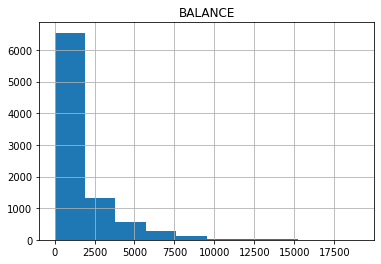

2.393270481328754


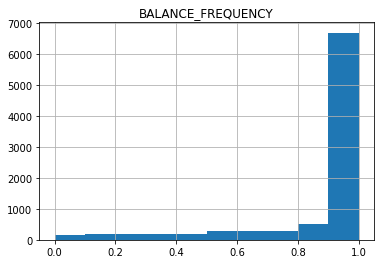

-2.0241932378008083


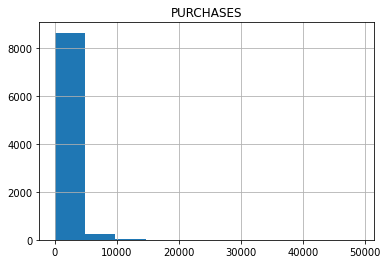

8.143969328745825


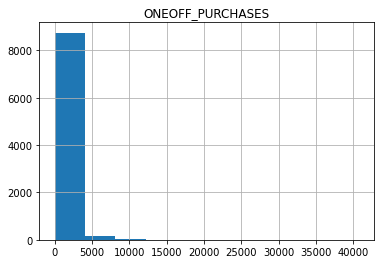

10.044621791824193


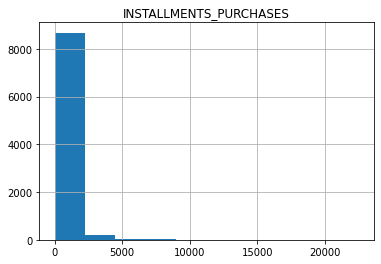

7.298823158100543


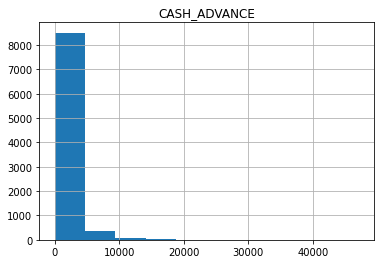

5.1663234455291605


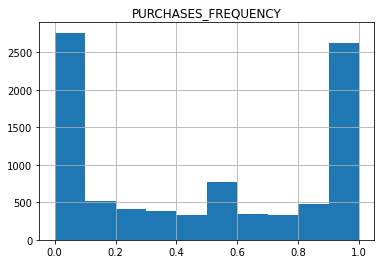

0.0599701177816327


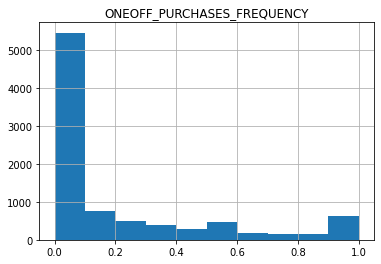

1.5354529638777794


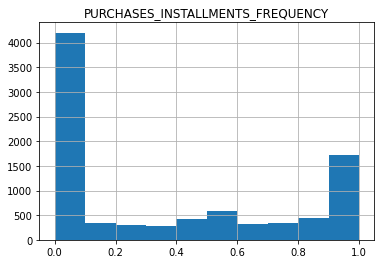

0.5090232211948914


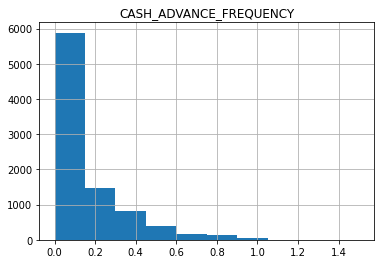

1.8286441199006067


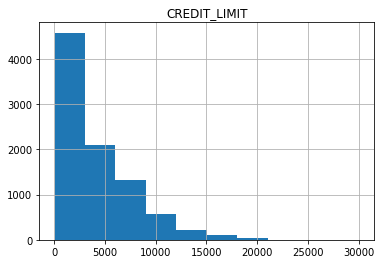

1.5224640052886198


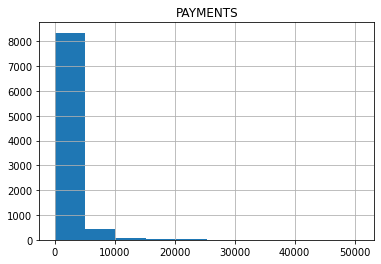

5.90746501386916


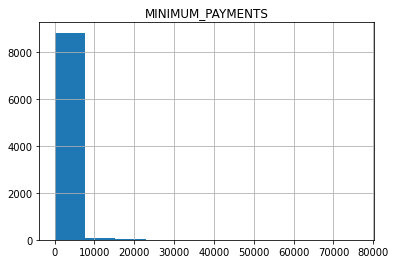

13.851852833613735


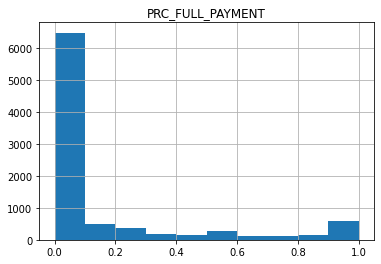

1.9426413977925


In [8]:
for i in data.select_dtypes('float64'):
  plt.title(i)
  data[i].hist()
  plt.show()
  print(str(data[i].skew()))

**most of the features have left or right skewness, and that is expected for Credit card data**

#**Algorithms without PCA**

In [9]:
#using standard scaler to transform data, and sole skewness
scaler = StandardScaler()
df = scaler.fit_transform(data.drop(columns=["CUST_ID"]))

##**Elbow method & DBSCAN**

**We use elbow method for finding the best eps (hyperparamater)**

In [10]:
from sklearn.neighbors import NearestNeighbors
mins = 3
nn = NearestNeighbors(n_neighbors=mins + 1)

nn.fit(df)

distances, neighbors = nn.kneighbors(df)
distances = np.sort(distances[:, mins], axis = 0)

/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: elbow.png


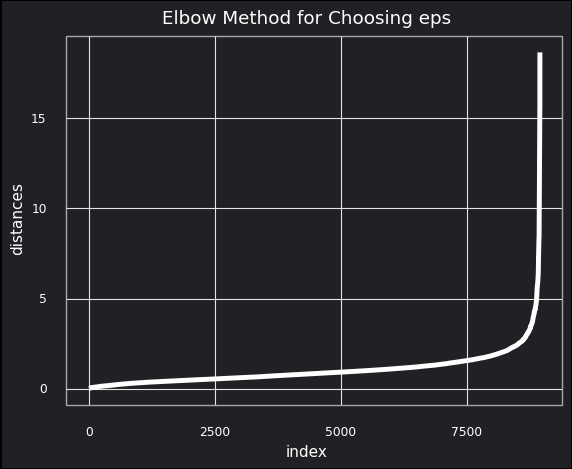

<ggplot: (8734553156100)>

In [11]:
from plotnine import *
distances_df = pd.DataFrame({"distances": distances,
                             "index": list(range(0,len(distances)))})
plt = (ggplot(distances_df, aes(x = "index", y = "distances")) +
 geom_line(color = "white", size = 2) + theme_minimal() +
 labs(title = "Elbow Method for Choosing eps") +
 theme(panel_grid_minor = element_blank(),
      rect = element_rect(fill = "#202124ff"),
      axis_text = element_text(color = "white"),
      axis_title = element_text(color = "white"),
      plot_title = element_text(color = "white"),
      panel_border = element_line(color = "darkgray"),
      plot_background = element_rect(fill = "#202124ff")
      ))
ggsave(plot=plt, filename='elbow.png', dpi=300)

plt

###**DBSCAN**

In [30]:
db = DBSCAN(eps = 3, min_samples = 50).fit(df)
#df["label"] = db.labels_
print(silhouette_score(df,db.labels_ ))
print(np.unique(db.labels_,return_counts=True))

0.576239412183937
(array([-1,  0]), array([ 344, 8606]))


**DBSCAN performance is bad, as it clusters the data into two clusters, one of them is noise, so it hasn't nearly learnt to cluster data correctly**

##**Hirercal clustering (Dendogram)**

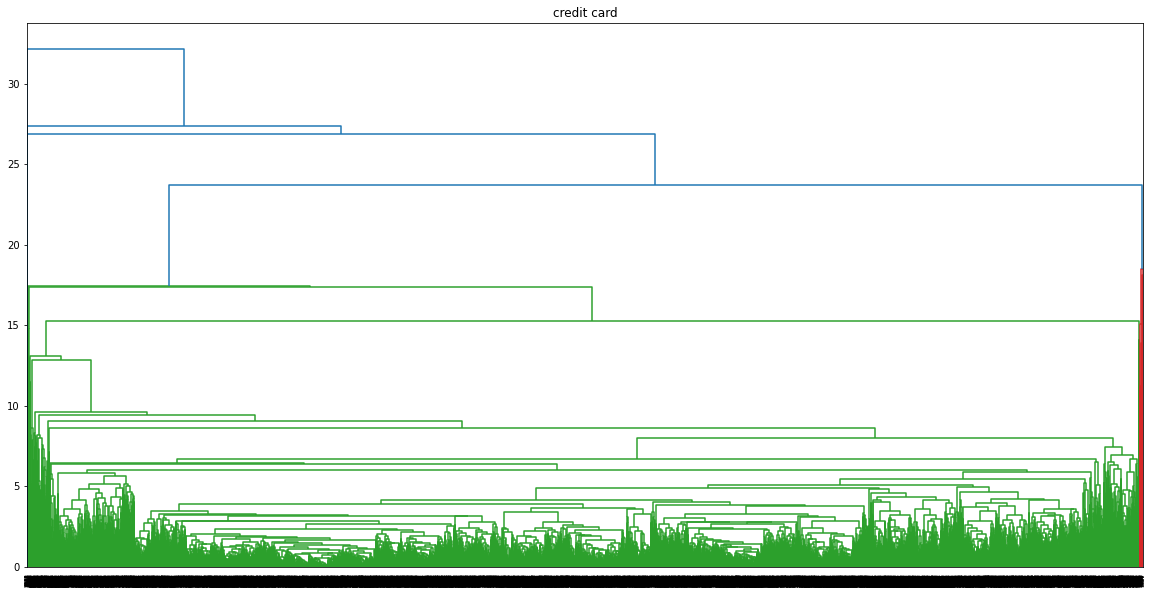

In [34]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.title("credit card")
dend = shc.dendrogram(shc.linkage(y= df , method='average',metric='euclidean'),orientation='top')

In [21]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

model = AgglomerativeClustering(6)

y=model.fit_predict(df)
print(silhouette_score(df,y))
print(np.unique(y,return_counts=True))

0.17182684859614872
(array([0, 1, 2, 3, 4, 5]), array([3445, 3206, 1194,  330,  751,   23]))


*   k = 2 ---> score = 0.175
*   k = 3 ---> score = 0.157
*   k = 4 ---> score = 0.156
*   k = 5 ---> score = 0.169
*   k = 6 ---> score = 0.171
*   k = 7 ---> score = 0.154
*   k = 8 ---> score = 0.145

**the best k was @ k = 6 and it produces 6 clusters** 





##**kmeans**

In [28]:
from sklearn.cluster import KMeans
model = KMeans(8)
model.fit(df)
y=model.fit_predict(df)
print(silhouette_score(df,y))
print(np.unique(y,return_counts=True))

0.21898075324686966
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([ 627, 2816, 2024,  900, 1260,   80,   55, 1187]))


*   k = 2 ---> score = 0.21
*   k = 3 ---> score = 0.25
*   k = 4 ---> score = 0.197
*   k = 5 ---> score = 0.193
*   k = 6 ---> score = 0.20
*   k = 7 ---> score = 0.215
*   k = 8 ---> score = 0.219

**the best k was @ k = 3** 

##**GaussianMixture**

In [36]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(2)
gm.fit(df)
print(silhouette_score(df, gm.predict(df)))
print(np.unique(gm.predict(df),return_counts=True))

0.1849964790369622
(array([0, 1]), array([5768, 3181]))


*   k = 2 ---> score = 0.196
*   k = 3 ---> score = 0.113
*   k = 4 ---> score = 0.068
*   k = 5 ---> score = 0.075
*   k = 6 ---> score = 0.052
*   k = 7 ---> score = 0.043

**the best k was @ k = 2** 

#**Kmeans with PCA**

**Since Kmeans produces the best performance, we should give it a shot using PCA to see if PCA increases its performance!**

In [37]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
model = KMeans(3)


for i in range(1,18):
  pca = PCA(i)
  comp = pca.fit_transform(df)
  
  y=model.fit_predict(comp)
  from sklearn.metrics import silhouette_score
  print(i," : ",silhouette_score(comp,y))

1  :  0.5903049572287636
2  :  0.4505833534445322
3  :  0.3796286886112352
4  :  0.3438320607549314
5  :  0.31553307250171975
6  :  0.29558951750097195
7  :  0.28391916244472215
8  :  0.27409312085542403
9  :  0.2620836526486356
10  :  0.2586358956186148
11  :  0.2561706253149186
12  :  0.25353132752800395
13  :  0.25298626465332186
14  :  0.25257425160252767
15  :  0.25081103492411155
16  :  0.25060187959982905
17  :  0.25055449407779423


**As seen here, when using PCA of 9 components or higher,it doesn't increase score,while using PCA of less than 9 Components, it increases score dramatically!**

In [38]:
pca = PCA(3)
componants = pca.fit_transform(df)
y=model.fit_predict(componants)
print(silhouette_score(componants,y))

0.3801072685415385


* **here we use PCA of 3 components, and the score increases from 0.25 without PCA, to 0.38 with PCA**

* **here we use k = 3 as chosen from that last tuning**
